In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler

In [3]:
df =pd.read_csv("archive/data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [13]:
# 데이터 기술통계
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [33]:
# 분산
for col in df.keys()[2:-1]:
    print(col, df[col].var())

radius_mean 12.418920129526725
texture_mean 18.49890867905146
perimeter_mean 590.44047952177
area_mean 123843.55431768096
smoothness_mean 0.00019779970027290276
compactness_mean 0.0027891874004381304
concavity_mean 0.006355247900423132
concave points_mean 0.0015056607691635421
symmetry_mean 0.000751542821171316
fractal_dimension_mean 4.984872279821284e-05
radius_se 0.07690235187622226
texture_se 0.304315949077143
perimeter_se 4.087895837700807
area_se 2069.431582868732
smoothness_se 9.01511400307558e-06
compactness_se 0.0003207028867606187
concavity_se 0.0009111982378230941
concave points_se 3.807241912906256e-05
symmetry_se 6.833289825212879e-05
fractal_dimension_se 7.001691562872344e-06
radius_worst 23.36022417517761
texture_worst 37.776482768756686
perimeter_worst 1129.1308469423745
area_worst 324167.3851021686
smoothness_worst 0.0005213198325267949
compactness_worst 0.024754770743704038
concavity_worst 0.04352409045926074
concave points_worst 0.004320740679099747
symmetry_worst 0.0

In [219]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:title={'center':'종양 비율'}, ylabel='diagnosis'>

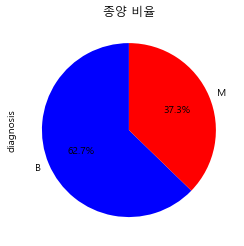

In [222]:
# 종양 수 
d = df["diagnosis"].value_counts()
# 악성종양은 212개, 양성종양은 357개
d.plot.pie(autopct = "%.1f%%",
             title = "종양 비율",
             startangle=90,
             colors = ["b","r"])

<ipython-input-199-716709acbabf>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,4))


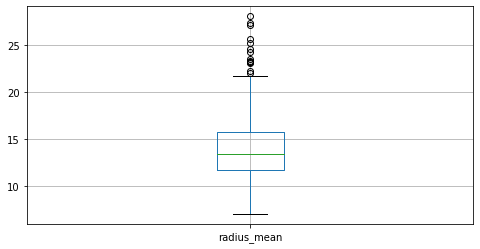

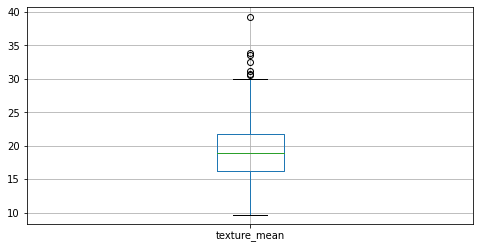

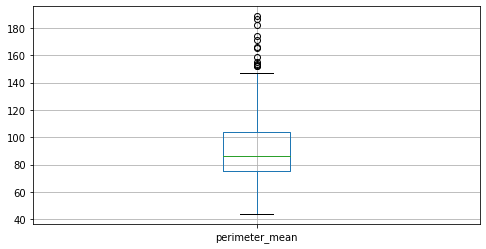

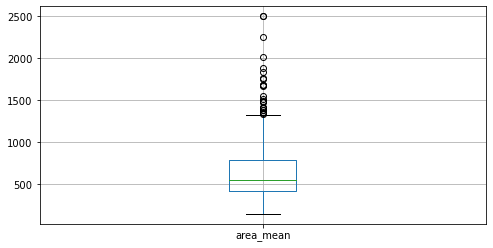

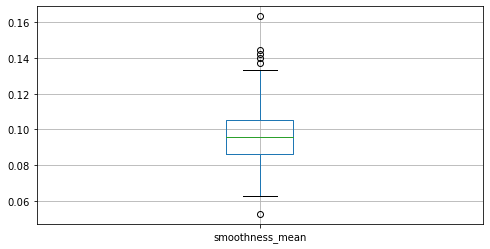

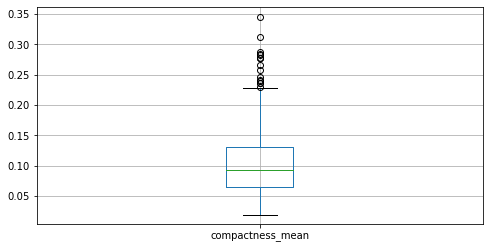

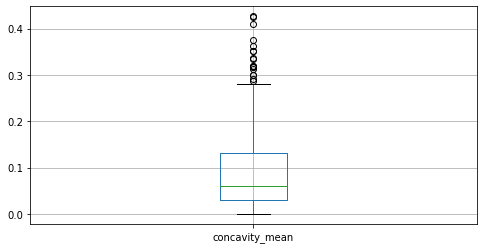

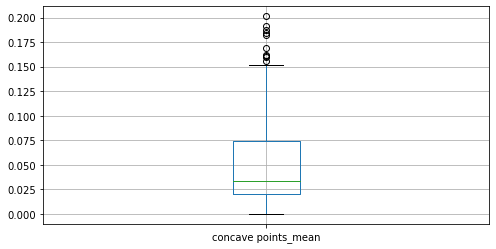

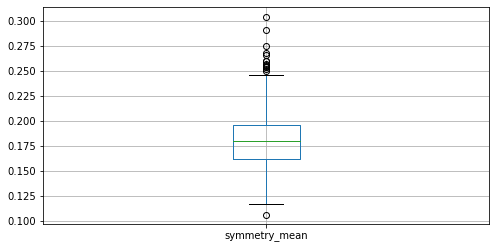

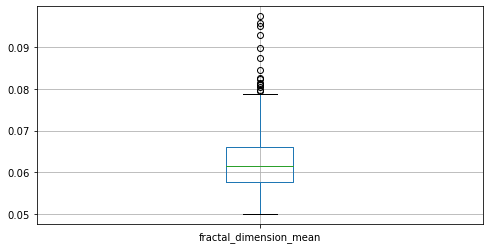

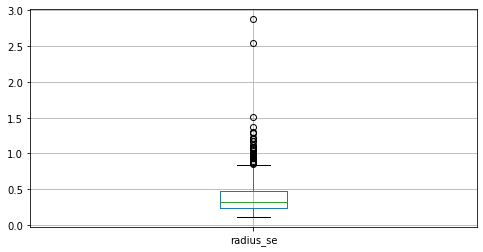

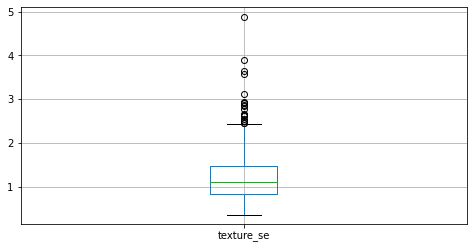

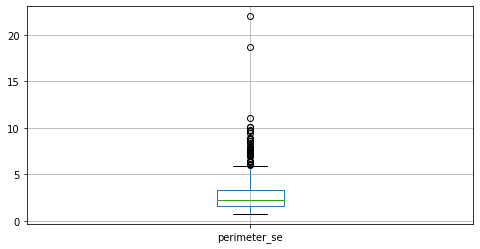

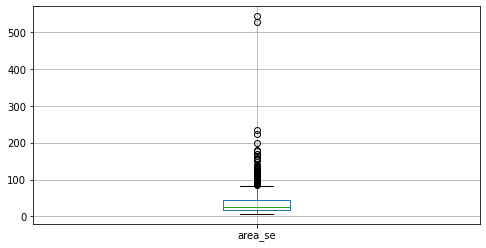

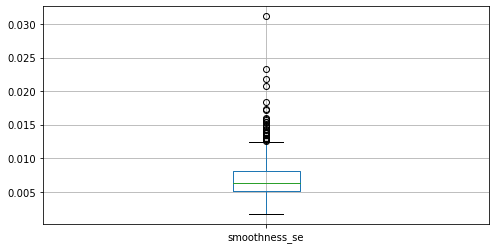

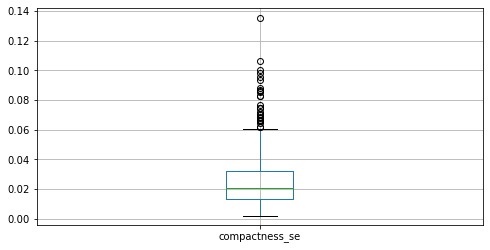

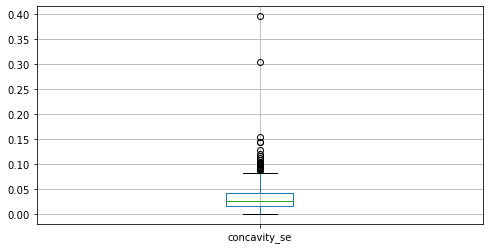

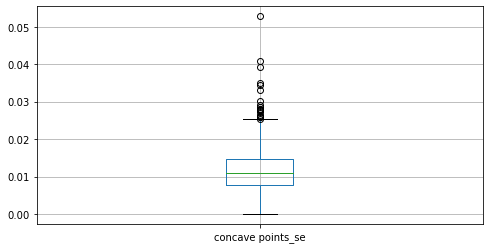

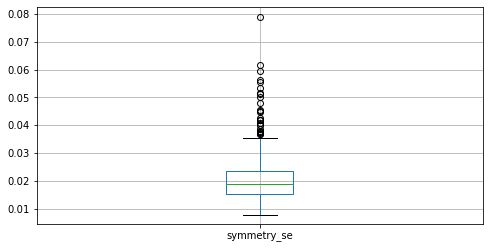

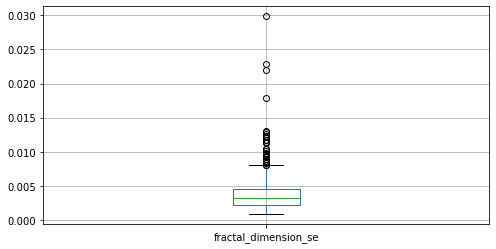

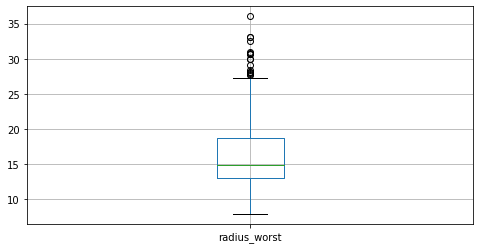

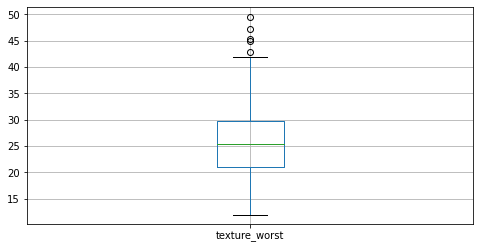

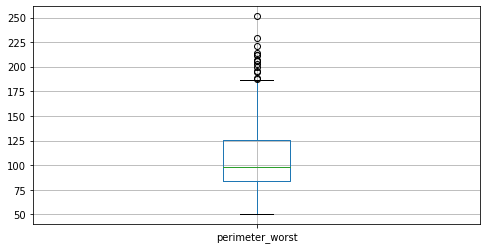

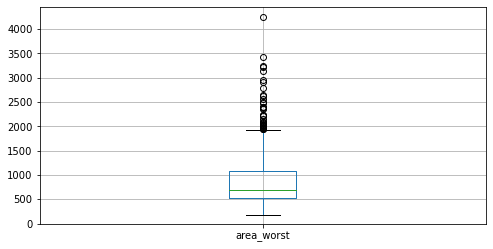

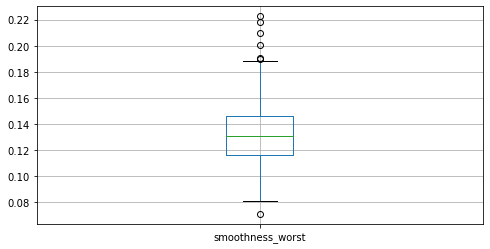

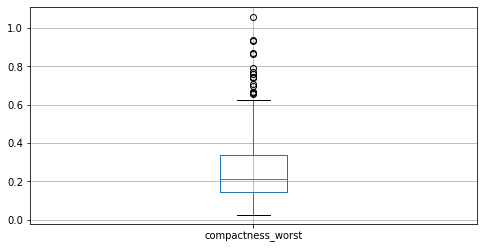

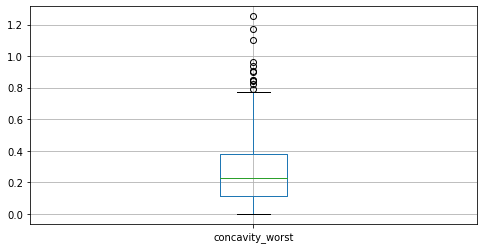

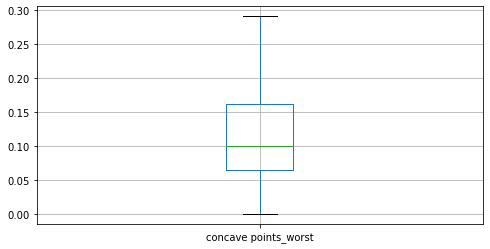

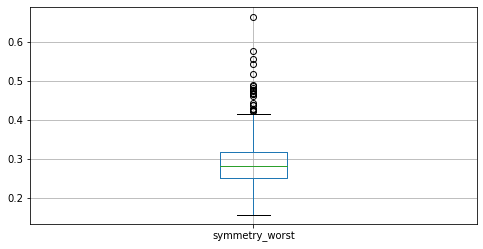

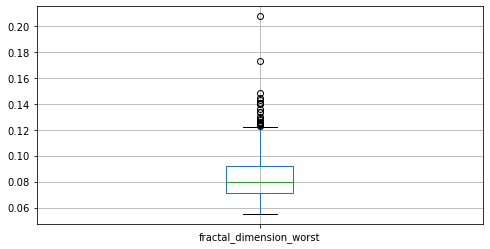

In [199]:
# 이상치

for i in df.keys()[2:-1]:
    plt.figure(figsize=(8,4))
    df[[i]].boxplot()

이상치 확인 결과 이상치가 많은 컬럼들이 많았음 -> 표준화 필요성 느낌

## 표준화

In [74]:
# numpy활용 
a = (df - np.mean(df)) / np.std(df)
a

,Unnamed: 32,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
0,NaN,0.984375,2.487578,2.001237,3.283515,1.316862,2.616665,2.532475,0.660820,2.296076,...,1.886690,1.568466,-0.214002,1.307686,2.217515,1.148757,2.750622,-2.073335,-0.565265,-1.359293
1,NaN,1.908708,0.742402,1.890489,-0.487072,-0.692926,-0.430444,0.548144,0.260162,1.087084,...,1.805927,-0.826962,-0.605351,-0.375612,0.001392,-0.805450,-0.243890,-0.353632,-0.876244,-0.369203
2,NaN,1.558884,1.181336,1.456285,1.052926,0.814974,1.082932,2.037231,1.424827,1.955000,...,1.511870,0.942210,-0.297005,0.527407,0.939685,0.237036,1.152255,0.456187,-0.780083,-0.023974
3,NaN,-0.764464,-0.288378,-0.550021,3.402909,2.744280,3.893397,1.451707,1.115007,2.175786,...,-0.281464,3.283553,0.689702,3.394275,2.867383,4.732680,6.046041,0.253732,-0.110409,0.133984
4,NaN,1.826229,1.190357,1.220724,0.539340,-0.048520,-0.313395,1.428493,1.144205,0.729259,...,1.298575,0.280372,1.483067,0.220556,-0.009560,-0.361092,-0.868353,-1.151816,-0.790244,-1.466770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,NaN,2.343856,2.604187,2.015301,0.219060,0.191805,-0.273318,2.320965,2.067178,1.629151,...,1.901185,1.041842,1.086384,0.378365,-0.312589,-1.138416,-1.360158,0.721473,0.071025,0.117700
565,NaN,1.723842,1.291565,1.494959,-0.017833,-0.069758,-0.394820,1.263669,0.808431,0.733827,...,1.536720,0.102458,-0.424010,-0.691230,-0.217664,-0.189161,-0.531855,2.085134,2.260938,2.047399
566,NaN,0.577953,0.180698,0.427906,-0.038680,0.661277,0.350735,0.105777,0.612157,0.414069,...,0.561361,-0.840484,-0.379342,-0.809587,-0.809117,-0.891416,-1.104549,2.045574,-0.257371,1.374854
567,NaN,1.735218,1.009503,1.653171,3.272144,2.017716,3.904848,2.658866,0.785721,2.289985,...,1.961239,1.525767,-0.173000,1.430427,2.137194,0.326634,1.919083,2.336457,0.686088,2.237926


In [94]:
# scipy.stats 활용

a = ss.zscore(df.iloc[:,2:])
df_s1 = pd.DataFrame(a,columns = df.keys()[2:])
df_s1.dropna(axis = 1,inplace=True)
df_s1.insert(0,"id", df["id"])
df_s1.insert(1,"diagnosis",df["diagnosis"])
df_s1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,926682,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,926954,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,927241,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [95]:
# StandardScaler 활용

a = StandardScaler().fit_transform(df.iloc[:,2:])
df_s2 = pd.DataFrame(a,columns = df.keys()[2:])
df_s2.dropna(axis = 1,inplace=True)
df_s2.insert(0,"id", df["id"])
df_s2.insert(1,"diagnosis",df["diagnosis"])
df_s2

C:\Users\NaEunSu\anaconda3\lib\site-packages\sklearn\utils\extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\NaEunSu\anaconda3\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,926682,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,926954,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,927241,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


<AxesSubplot:xlabel='radius_mean'>

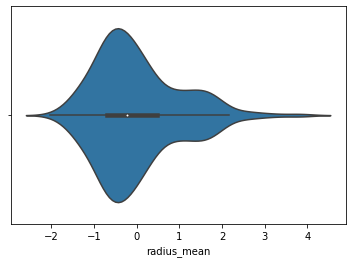

In [209]:
sns.violinplot(x = "radius_mean",data = df_s1)

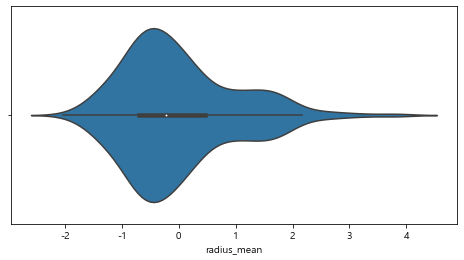

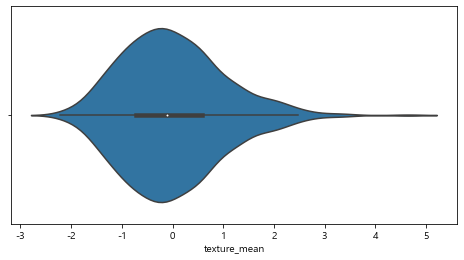

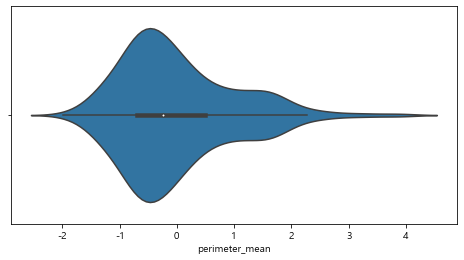

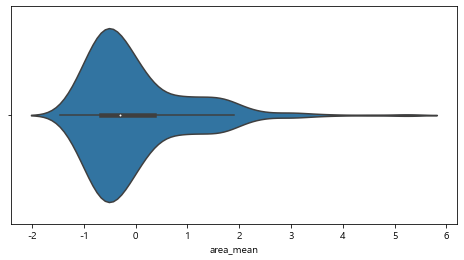

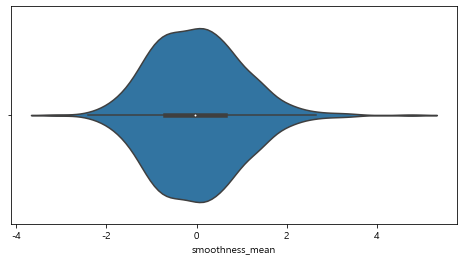

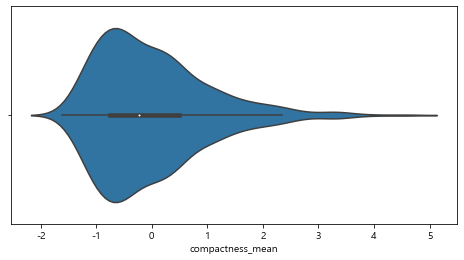

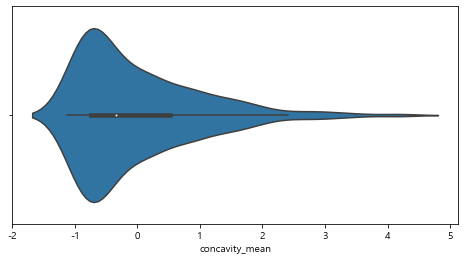

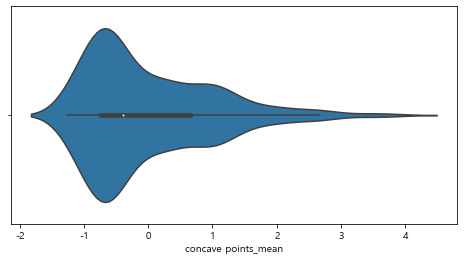

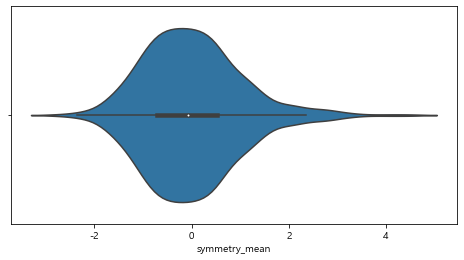

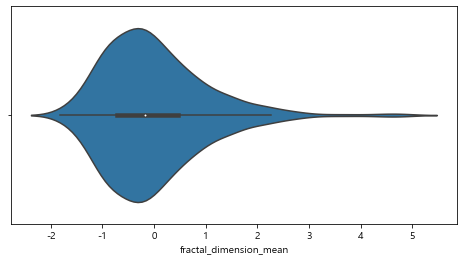

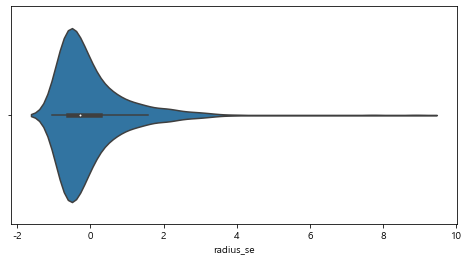

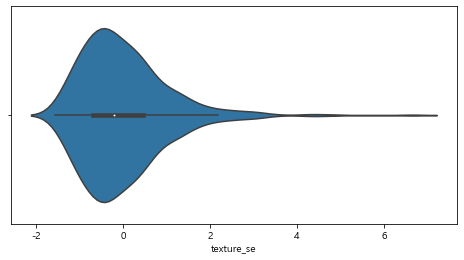

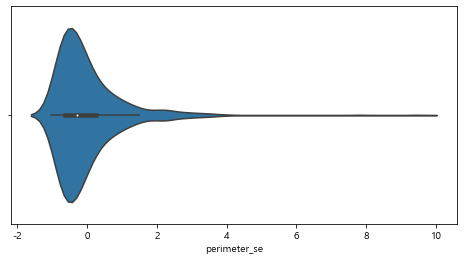

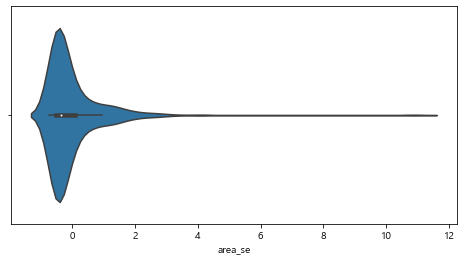

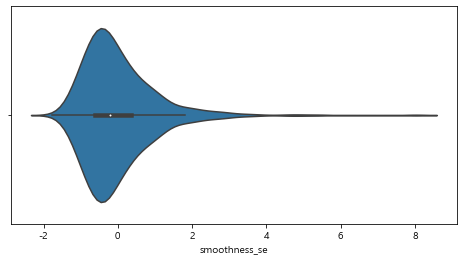

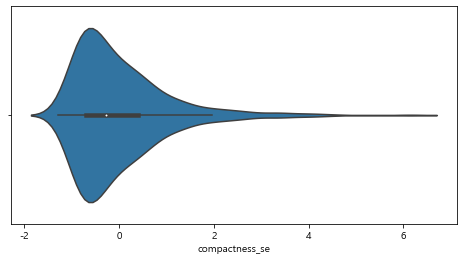

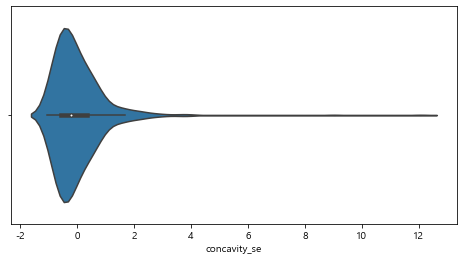

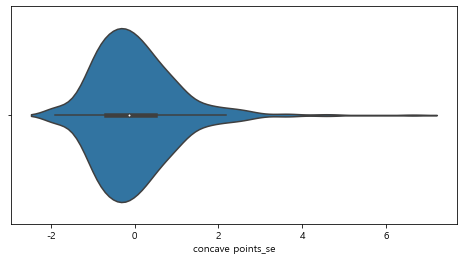

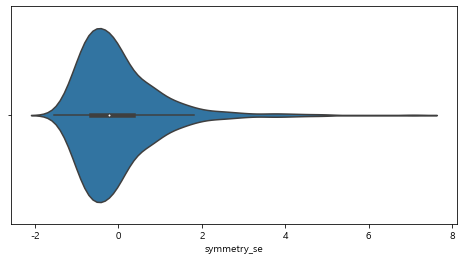

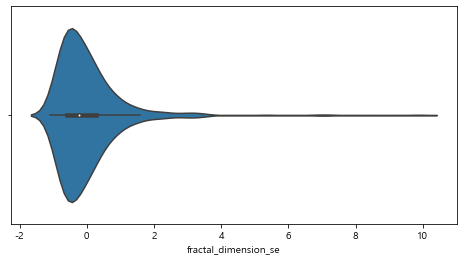

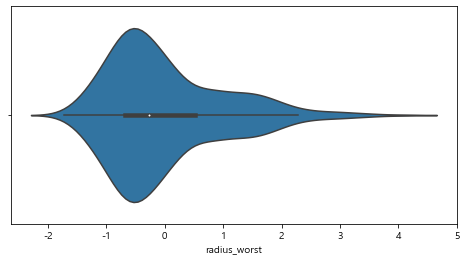

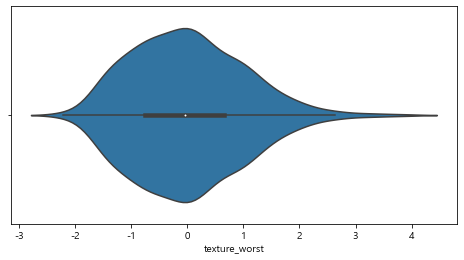

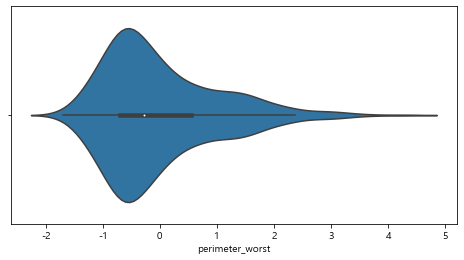

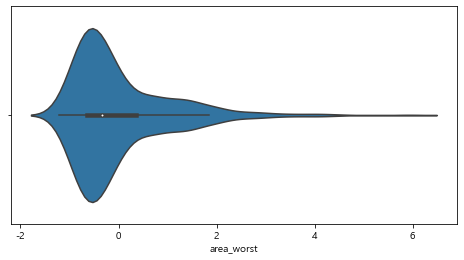

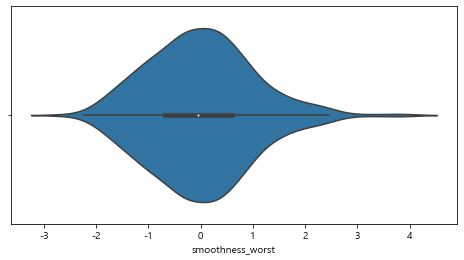

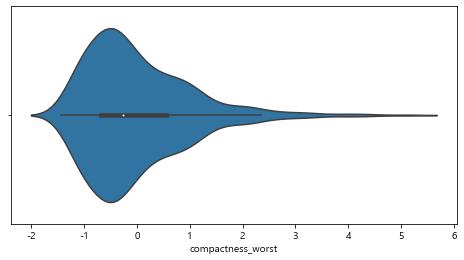

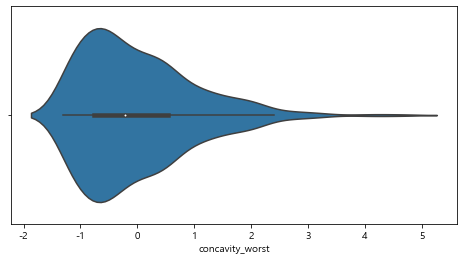

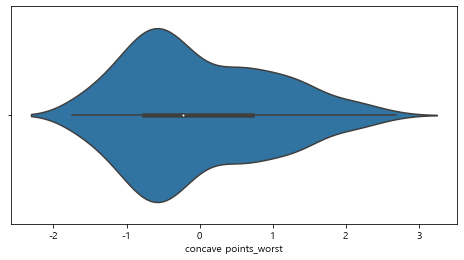

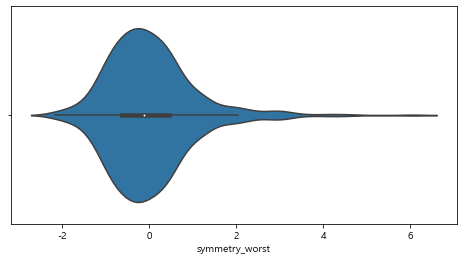

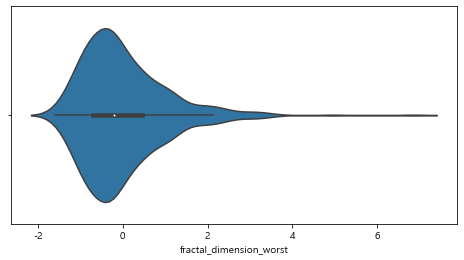

In [223]:
# 이상치 다시 검사

for i in df_s1.keys()[2:]:
    plt.figure(figsize=(8,4))
    sns.violinplot(x = i,data = df_s1)

## 3) plot 시각화

In [156]:
df_diag = df.pivot_table(index = "diagnosis")
df_diag

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,462.790196,21.135148,558.899440,0.080085,0.021438,0.182673,0.025717,0.009858,0.074444,0.046058,...,13.379801,0.092478,0.007196,0.124959,0.174186,0.020584,0.270246,17.914762,1.220380,23.515070
M,978.376415,72.672406,1422.286321,0.145188,0.032281,0.374824,0.087990,0.015060,0.182237,0.160775,...,21.134811,0.102898,0.006780,0.144845,0.192909,0.020472,0.323468,21.604906,1.210915,29.318208


<Figure size 1152x720 with 0 Axes>

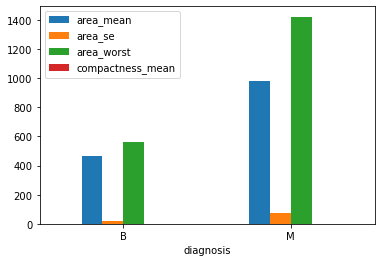

<Figure size 1152x720 with 0 Axes>

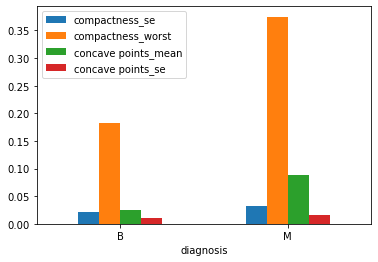

<Figure size 1152x720 with 0 Axes>

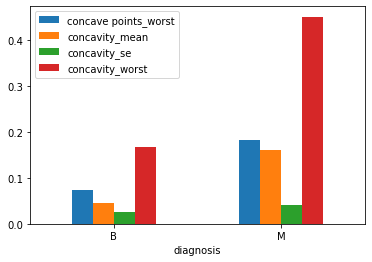

<Figure size 1152x720 with 0 Axes>

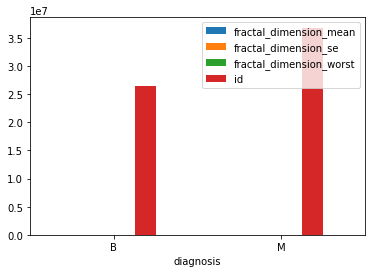

<Figure size 1152x720 with 0 Axes>

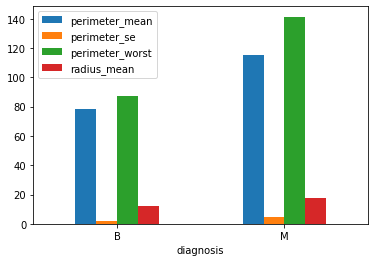

<Figure size 1152x720 with 0 Axes>

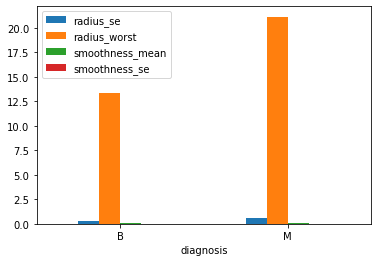

<Figure size 1152x720 with 0 Axes>

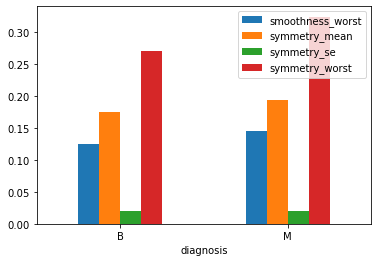

<Figure size 1152x720 with 0 Axes>

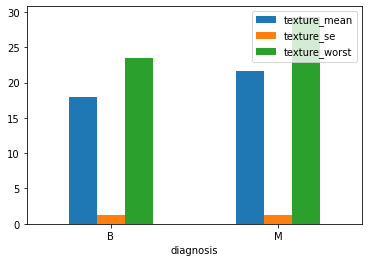

In [158]:
# 악성종양과 양성종양 특징 비교

for i in range(1,9):
    plt.figure(figsize = (16,10))
    df_diag.iloc[:,4*(i-1):4*i].plot.bar(rot = 0)

In [159]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [174]:
# radius_mean, area_mean, area_worst 상관관계

area = df[["radius_mean","area_mean", "area_worst","diagnosis"]]
area.corr() # 높은 양의 상관관계임을 알 수 있음

,radius_mean,area_mean,area_worst
radius_mean,1.000000,0.987357,0.941082
area_mean,0.987357,1.000000,0.959213
area_worst,0.941082,0.959213,1.000000


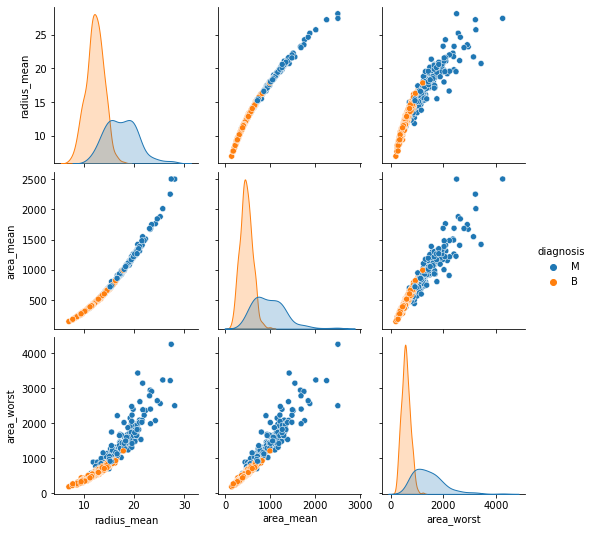

In [176]:
sns.pairplot(area, hue="diagnosis")

## 4. melt

In [125]:
df.melt(id_vars=["diagnosis"], var_name="feature")

,diagnosis,feature,value
0,M,id,842302.0
1,M,id,842517.0
2,M,id,84300903.0
3,M,id,84348301.0
4,M,id,84358402.0
...,...,...,...
18203,M,Unnamed: 32,NaN
18204,M,Unnamed: 32,NaN
18205,M,Unnamed: 32,NaN
18206,M,Unnamed: 32,NaN
